# Hierarchical clustering

## Imports

In [1]:
import numpy as np
import networkx as nx

In [2]:
from paris import paris
from louvain import louvain
from spectral import spectral
from utils import *

## Synthetic data

In [3]:
numbers = [4,4,20]
intensities = [.05,.05,1]
hsbm_model = hsbm(numbers, intensities)
G = hsbm_model.create_graph()
while not nx.is_connected(G):
    G = hsbm_model.create_graph()
pos = nx.spring_layout(G)
D = paris(G)

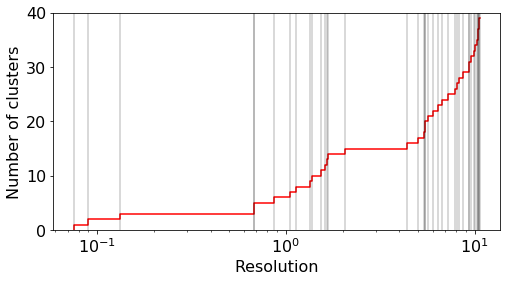

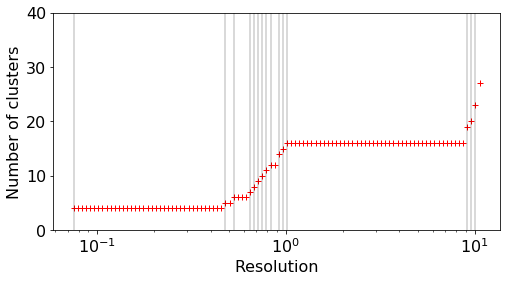

In [4]:
m = 40
resolutions = 1 / D[-m:,2]
resolution_analysis(G,resolutions)

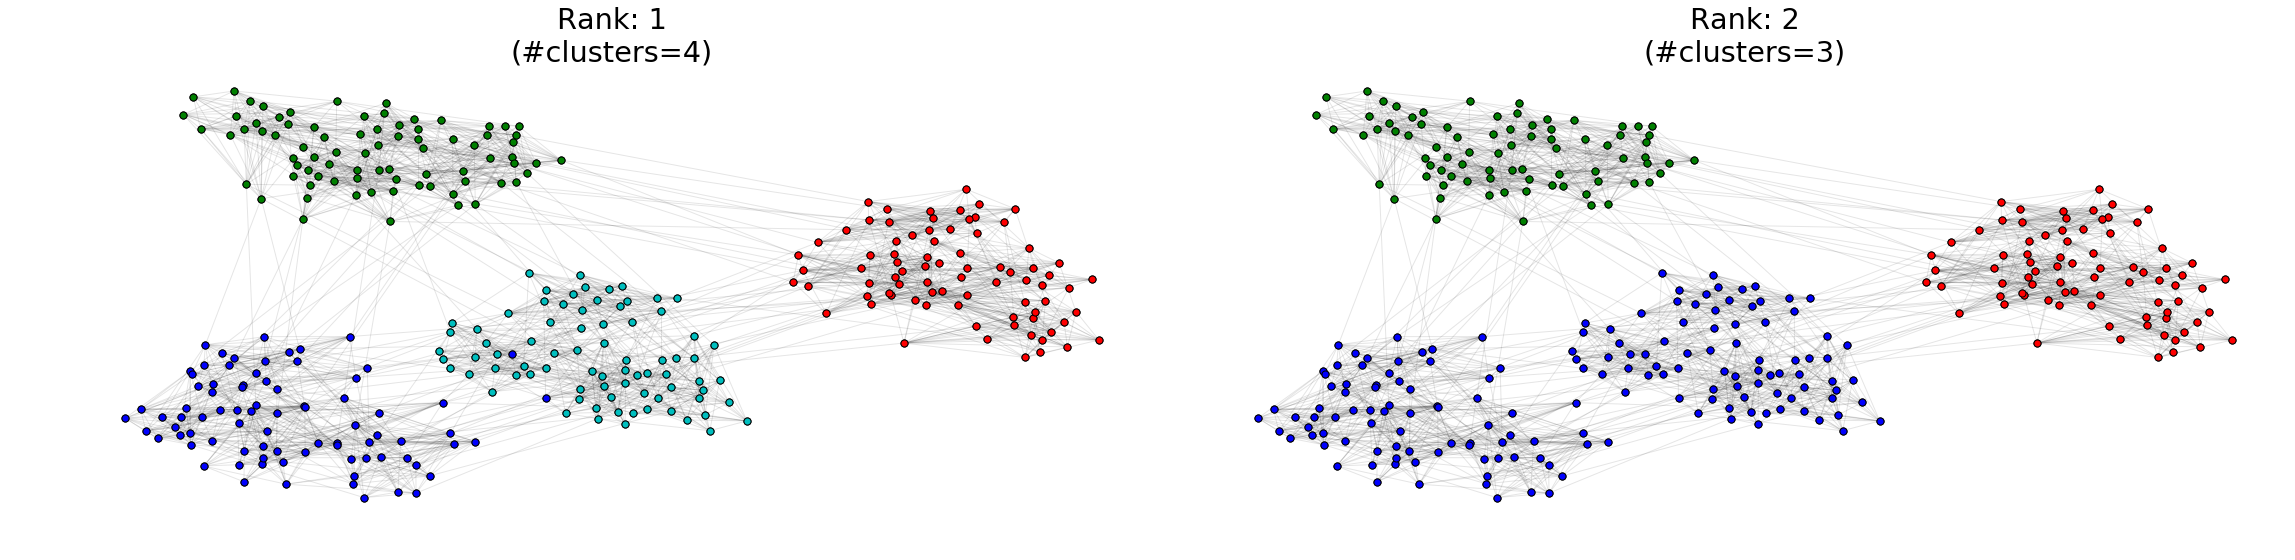

In [9]:
plot_best_clusterings(G, D, 2, pos)

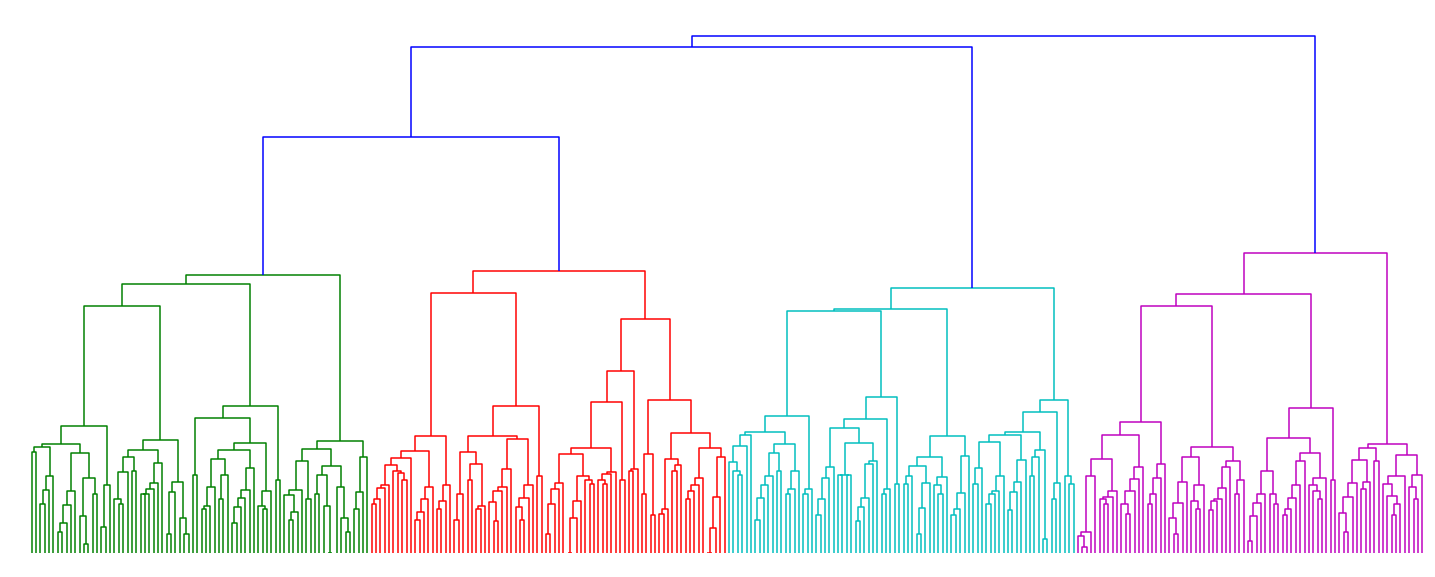

In [10]:
plot_dendrogram(D)

## Real data

The datasets are available [here](https://perso.telecom-paristech.fr/bonald/graphs/paris.zip)

- OpenStreet
- OpenFlights
- Wikipedia for schools
- Wikipedia restricted to humans

In [3]:
G = nx.read_graphml("openstreet.graphml", node_type = int)
print(nx.info(G))

Name: Openstreet
Type: Graph
Number of nodes: 5993
Number of edges: 6958
Average degree:   2.3220


In [4]:
D = paris(G)

In [5]:
pos_x = nx.get_node_attributes(G,'pos_x')
pos_y = nx.get_node_attributes(G,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in G.nodes()}

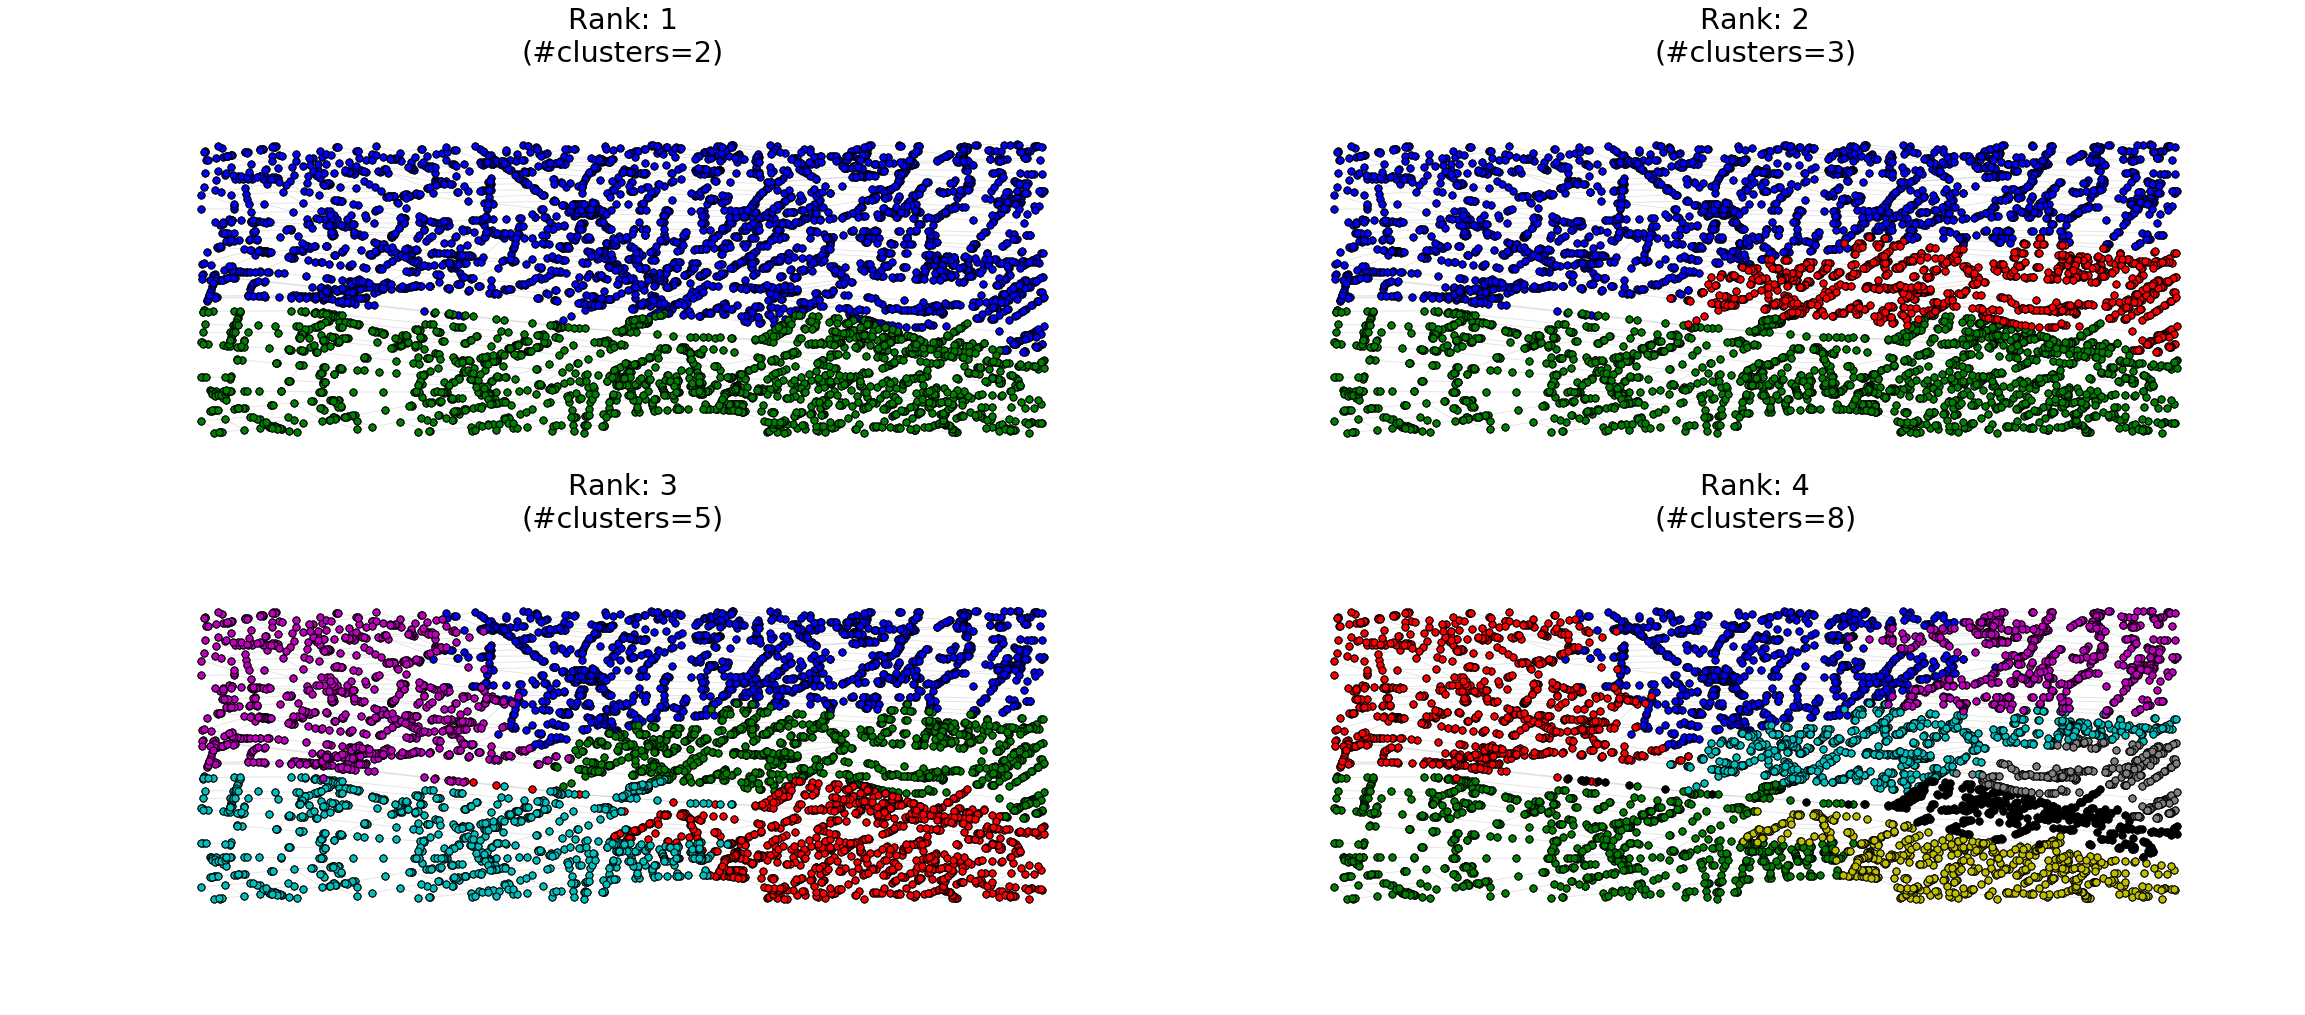

In [6]:
plot_best_clusterings(G, D, 4, pos)

In [13]:
G = nx.read_graphml("openflights.graphml", node_type = int)
print(nx.info(G))

Name: Openflights
Type: Graph
Number of nodes: 3097
Number of edges: 18193
Average degree:  11.7488


In [14]:
D = paris(G)

In [15]:
pos_x = nx.get_node_attributes(G,'pos_x')
pos_y = nx.get_node_attributes(G,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in G.nodes()}

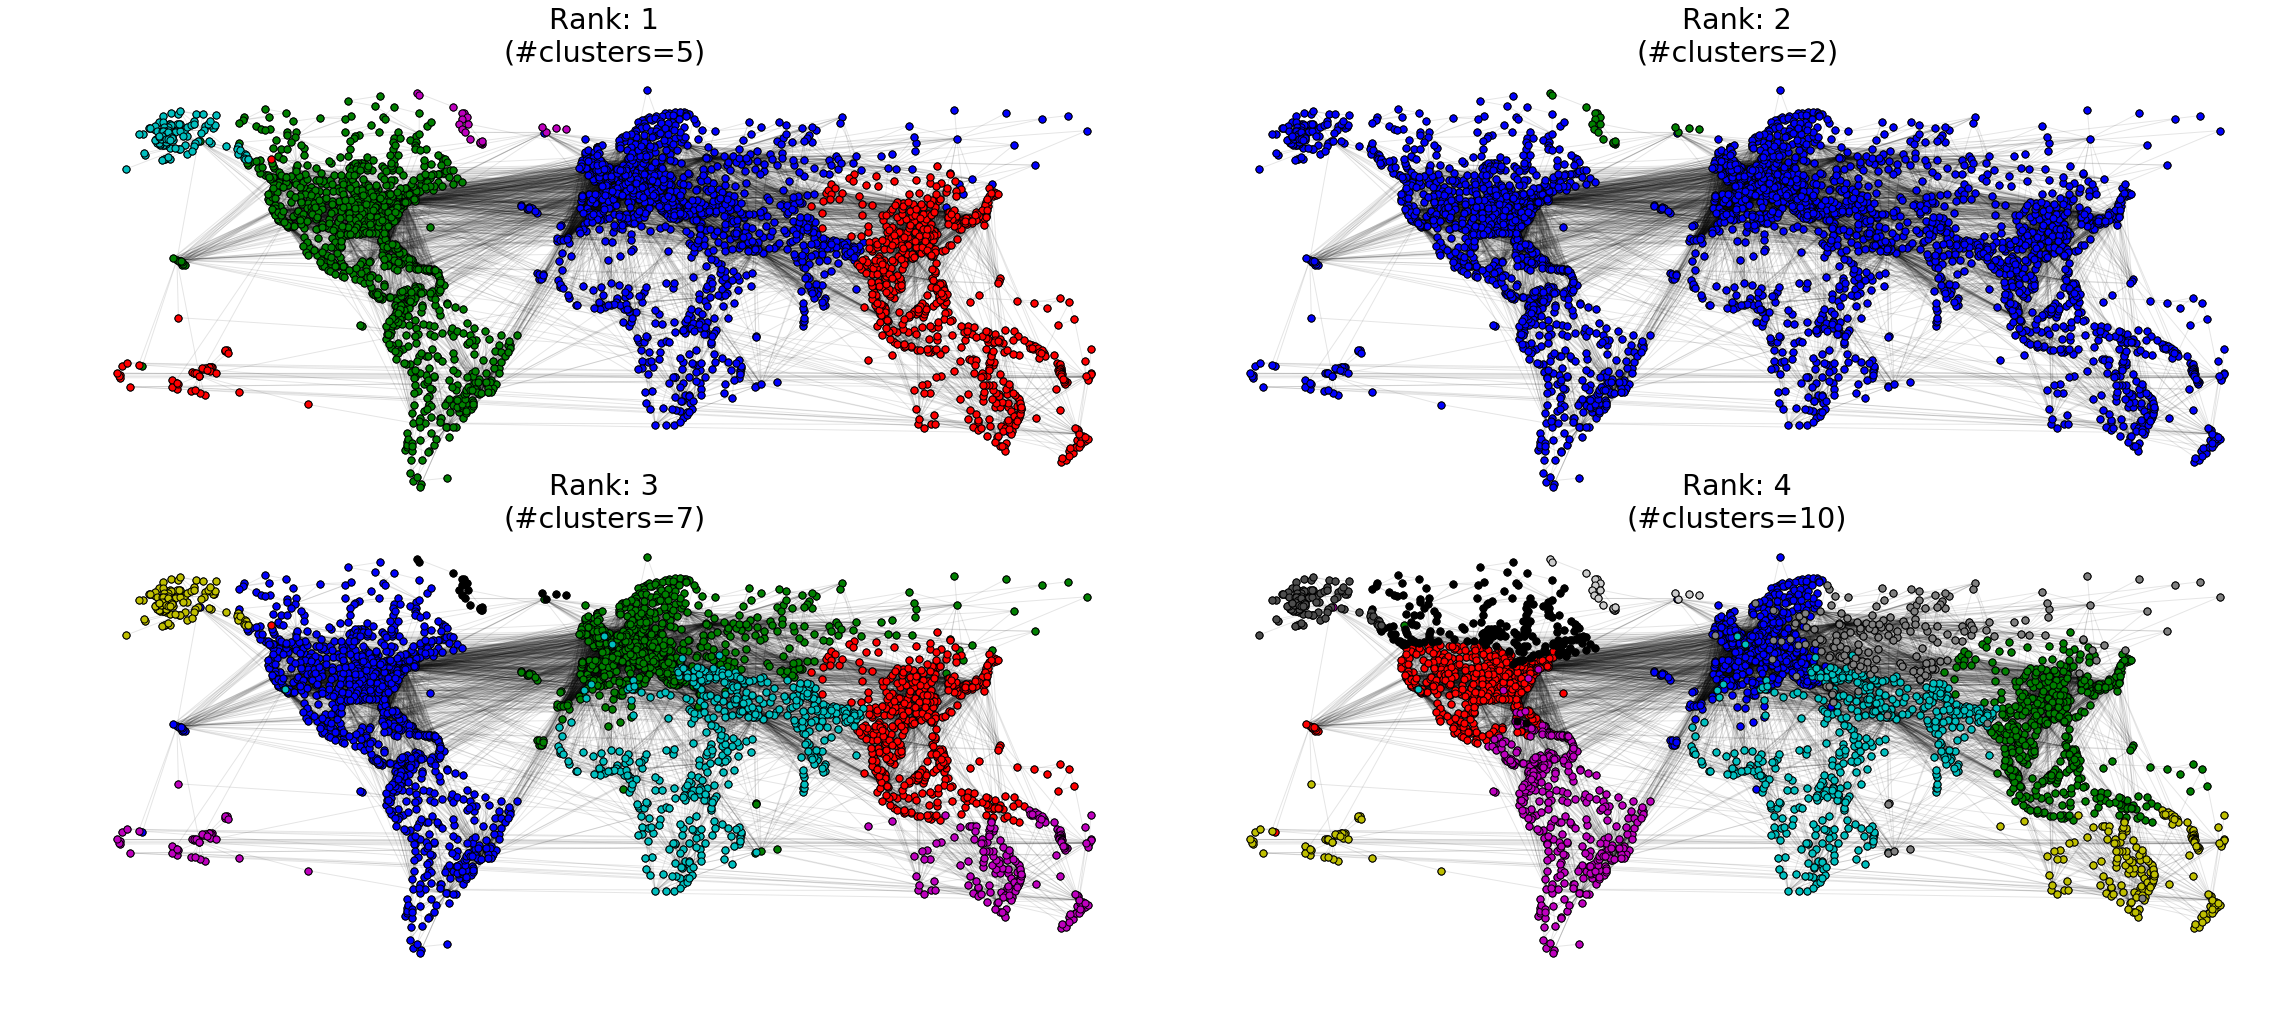

In [16]:
plot_best_clusterings(G, D, 4, pos)

In [17]:
G = nx.read_graphml("wikipedia_schools.graphml", node_type = int)
print(nx.info(G))

Name: Wikipedia for school
Type: Graph
Number of nodes: 4589
Number of edges: 106644
Average degree:  46.4781


In [18]:
D = paris(G)

In [19]:
name = nx.get_node_attributes(G,'name')

In [20]:
# Clustering with 100 clusters
n = len(list(G.nodes()))
clustering_high_level = select_clustering(D, n - 100)
show_largest_clusters(clustering_high_level, G, name)

#1
Size = 288
Scientific classification, Animal, Chordate, Binomial nomenclature, Bird, Carolus Linnaeus, Mammal, Dinosaur, Fossil, Reptile

#2
Size = 231
Iron, Oxygen, Electron, Hydrogen, Phase (matter), Color, Aluminium, Chemical element, Carbon, Magnetism

#3
Size = 196
England, Wales, Elizabeth II of the United Kingdom, Winston Churchill, William Shakespeare, British monarchy, Tony Blair, Pope, British House of Commons, Victoria of the United Kingdom

#4
Size = 164
Physics, Mathematics, Science, Albert Einstein, Electricity, Radio, Energy, Chemistry, Atom, Cornell University

#5
Size = 148
Portugal, Ethiopia, Mozambique, Madagascar, Sudan, Uganda, Kenya, Interpol, Somalia, Tanzania

#6
Size = 139
Washington, D.C., President of the United States, American Civil War, Puerto Rico, Bill Clinton, John F. Kennedy, Vietnam War, U.S. state, United States Congress, Theodore Roosevelt

#7
Size = 129
Earth, Sun, Astronomy, Star, Gravitation, Solar System, Light, Ultraviolet, Isaac Newton, Pla

In [21]:
# Subclusters at level 500 of the largest cluster at level 100
clustering_low_level = select_clustering(D, n - 500)
subclusters = extract_subclusters(clustering_high_level[0], clustering_low_level)
show_largest_clusters(subclusters, G, name)

#1
Size = 71
Dinosaur, Fossil, Reptile, Cretaceous, Jurassic, Herbivore, Carnivore, Tyrannosaurus, Triassic, Permian

#2
Size = 51
Binomial nomenclature, Bird, Carolus Linnaeus, Insect, Bird migration, Owl, House Sparrow, Chaffinch, Blackbird, Mallard

#3
Size = 24
Mammal, Lion, Cheetah, Giraffe, Nairobi, Antelope, Blue Wildebeest, Hyena, Lake Turkana, Wildebeest

#4
Size = 22
Animal, Ant, Arthropod, Spider, Bee, Beetle, Pollinator decline, Aphid, Beekeeping, Pollinator

#5
Size = 18
Dog, Bat, Vampire, George Byron, 6th Baron Byron, Bear, Rabies, Fox, Gray Wolf, Rabbit, Red rain in Kerala

#6
Size = 16
Eagle, Glacier National Park (US), Golden Eagle, Bald Eagle, Bird of prey, Hawk, Osprey, Avalanche, Vulture, Otter

#7
Size = 16
Chordate, Parrot, Gull, Surtsey, Herring Gull, Tiktaalik, Great Black-backed Gull, Galah, Pelagic zone, Puffin

#8
Size = 15
Feather, Extinct birds, Mount Rushmore, Cormorant, Woodpecker, Great Cormorant, Ivory-billed Woodpecker, Heron, Starling, Common Pheasan

In [3]:
G = nx.read_graphml("wikipedia_humans.graphml", node_type = int)
print(nx.info(G))

Name: Wikipedia restricted to humans
Type: Graph
Number of nodes: 702782
Number of edges: 3247884
Average degree:   9.2429


In [4]:
D = paris(G)

In [5]:
name = nx.get_node_attributes(G,'name')

In [6]:
# Clustering with 100 clusters
n = len(list(G.nodes()))
clustering_high_level = select_clustering(D, n - 100)
show_largest_clusters(clustering_high_level, G, name)

#1
Size = 41363
George W. Bush, Barack Obama, Bill Clinton, Ronald Reagan, Richard Nixon, Franklin D. Roosevelt, John F. Kennedy, George H. W. Bush, Jimmy Carter, Dwight D. Eisenhower

#2
Size = 34291
Alex Ferguson, David Beckham, Pelé, Diego Maradona, José Mourinho, Kevin Keegan, Arsène Wenger, Harry Redknapp, Cristiano Ronaldo, Graeme Souness

#3
Size = 25225
Abraham Lincoln, George Washington, Ulysses S. Grant, Thomas Jefferson, Edgar Allan Poe, David J. Eicher, Grover Cleveland, Andrew Jackson, Benjamin Franklin, Andrew Johnson

#4
Size = 23488
Madonna (entertainer), Woody Allen, Martin Scorsese, Tennessee Williams, Stephen Sondheim, Francis Ford Coppola, Robert De Niro, Marlon Brando, Oprah Winfrey, Stanley Kubrick

#5
Size = 23044
Wolfgang Amadeus Mozart, Johann Sebastian Bach, Ludwig van Beethoven, Richard Wagner, Giuseppe Verdi, Pyotr Ilyich Tchaikovsky, George Frideric Handel, Franz Liszt, Johannes Brahms, Igor Stravinsky

#6
Size = 22236
Elvis Presley, Bob Dylan, Elton John, 

In [7]:
# Subclusters at level 500 of the largest cluster at level 100
clustering_low_level = select_clustering(D, n - 500)
subclusters = extract_subclusters(clustering_high_level[0], clustering_low_level)
show_largest_clusters(subclusters, G, name)

#1
Size = 2722
Barack Obama, John McCain, Dick Cheney, Newt Gingrich, Nancy Pelosi, Michelle Obama, John Boehner, John Edwards, Clarence Thomas, Dennis Kucinich

#2
Size = 2443
Arnold Schwarzenegger, Jerry Brown, Ralph Nader, Dolph Lundgren, Earl Warren, Gloria Swanson, Gray Davis, Dianne Feinstein, Barbara Boxer, Harvey Milk

#3
Size = 2058
Osama bin Laden, Hamid Karzai, Alberto Gonzales, Janet Reno, Khalid Sheikh Mohammed, Ayman al-Zawahiri, Eric Holder, Omar Khadr, Guantanamo Bay attorneys, Ahmad Shah Massoud

#4
Size = 1917
Dwight D. Eisenhower, Harry S. Truman, Douglas MacArthur, George S. Patton, Charles Lindbergh, George Marshall, Amelia Earhart, Henry H. Arnold, Chester W. Nimitz, Vannevar Bush

#5
Size = 1742
George W. Bush, Condoleezza Rice, Colin Powell, Donald Rumsfeld, Karl Rove, Robert Gates, Bob Woodward, David Petraeus, Paul Wolfowitz, Wesley Clark

#6
Size = 1700
Bill Clinton, Thurgood Marshall, Mike Huckabee, John Roberts, William Rehnquist, Sandra Day O'Connor, Anton

## Running times

In [3]:
import time

In [4]:
def test_algo(G, algo, n_tests = 10):
    mean = 0.
    for l in range(n_tests):
        if algo == "louvain":
            t0 = time.time()
            C = louvain(G)
            t1 = time.time()
        elif algo == "paris":
            t0 = time.time()
            D = paris(G)
            t1 = time.time()
        elif algo == "spectral":
            t0 = time.time()
            D = spectral(G)
            t1 = time.time()
        mean += t1 - t0
    mean = mean / n_tests
    return mean

In [11]:
datasets = ["openstreet","openflights","wikipedia_schools","wikipedia_humans"]
G = nx.read_graphml(datasets[3] + ".graphml")

# Mean running time in seconds
n_tests = 1
print(test_algo(G,"louvain",n_tests))
print(test_algo(G,"paris", n_tests))
print(test_algo(G,"spectral",n_tests))

13.138505935668945
5.824115991592407
10.813201904296875
